In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
install.packages("car")
install.packages("cowplot")
install.packages("funModeling")
install.packages("skimr")
install.packages("caret")
library(cowplot)
suppressMessages(library(tidyverse)) 
suppressMessages(library(funModeling)) 
library(magrittr) 
library(skimr) 
library(caret)
library(reshape2)
options(scipen = 999)
options(repr.plot.width=12, repr.plot.height=8) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘gtools’, ‘caTools’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’, ‘gplots’, ‘plyr’, ‘Hmisc’, ‘ROCR’, ‘gridExtra’, ‘pander’, ‘reshape2’, ‘lazyeval’, ‘moments’, ‘entropy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’

# Loading the Dataset

In [ ]:
df <- read_csv('/content/USvideos_modified.csv')

# Summarising the Dataset

# Head of the Dataset

In [ ]:
head(df)

In [ ]:
names(df)

Statistical Summary


In [ ]:
summary(df)

Dimensions & Types of Attributes

In [ ]:
str(df)

# Cleaning the Dataset

In [ ]:
sum(is.na(df))

In [ ]:
mean(is.na(df))

In [ ]:
df = na.omit(df)

In [ ]:
str(df)

In [ ]:
sum(is.na(df))

# Correlation Analysis

In [ ]:
numerical_data <- df[c("views","likes","dislikes","comment_count","trend_day_count","trend_tag_highest","subscriber","tags_count")]

In [ ]:
head(numerical_data)

In [ ]:
cor.data <- cor(numerical_data)

In [ ]:
print(cor.data)

In [ ]:
install.packages("corrplot")
library(corrplot)

In [ ]:
corrplot(cor.data,method='color')

# Univariate Analysis

In [ ]:
plot(df$trend_day_count)

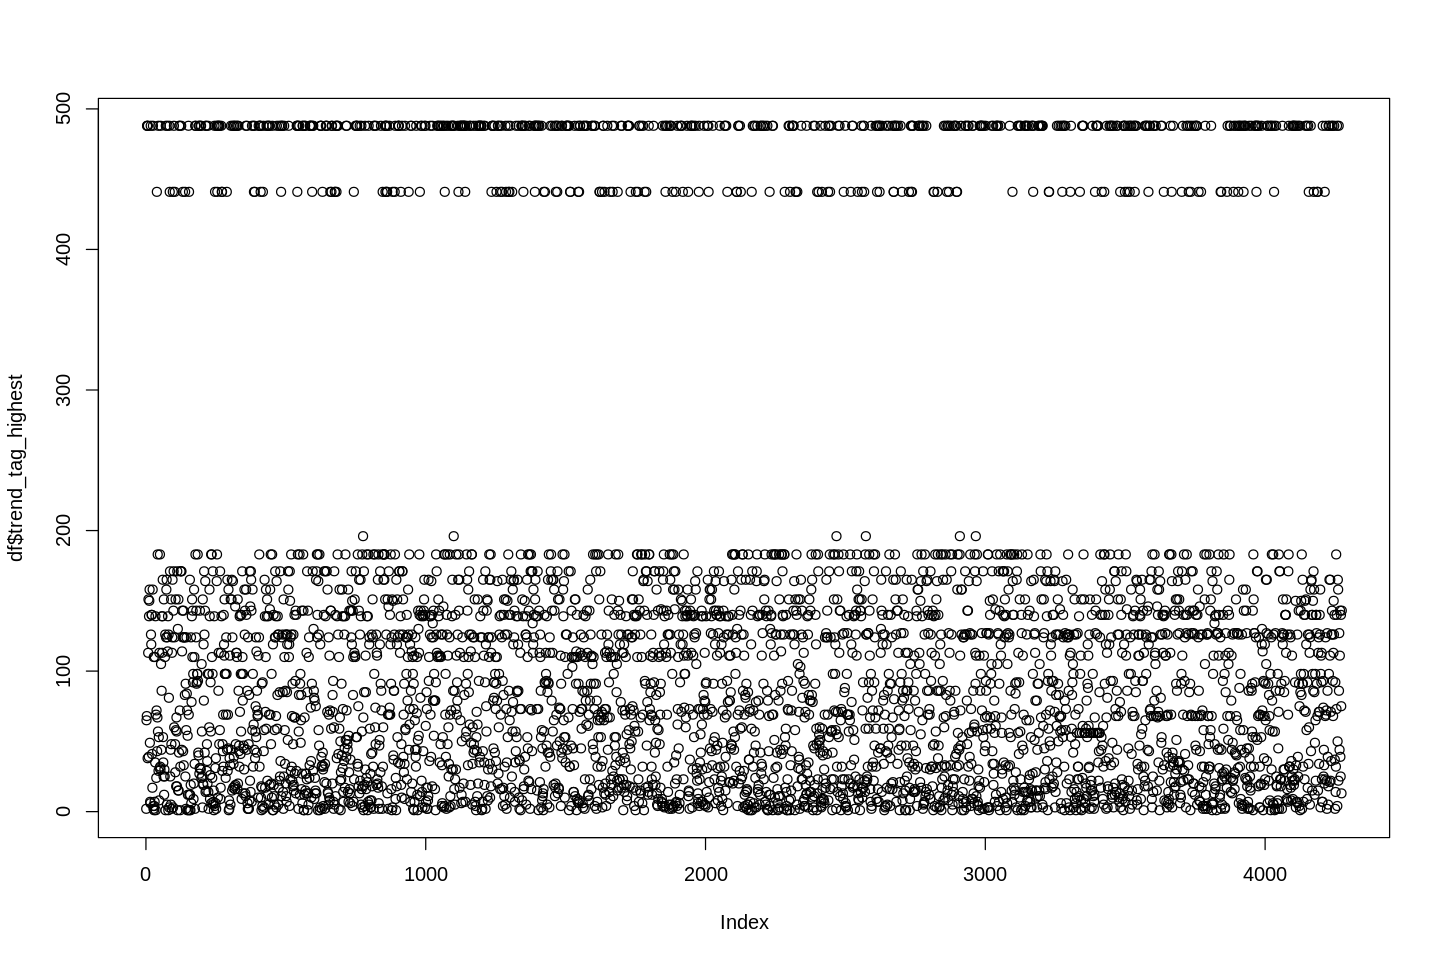

In [ ]:
plot(df$trend_tag_highest)

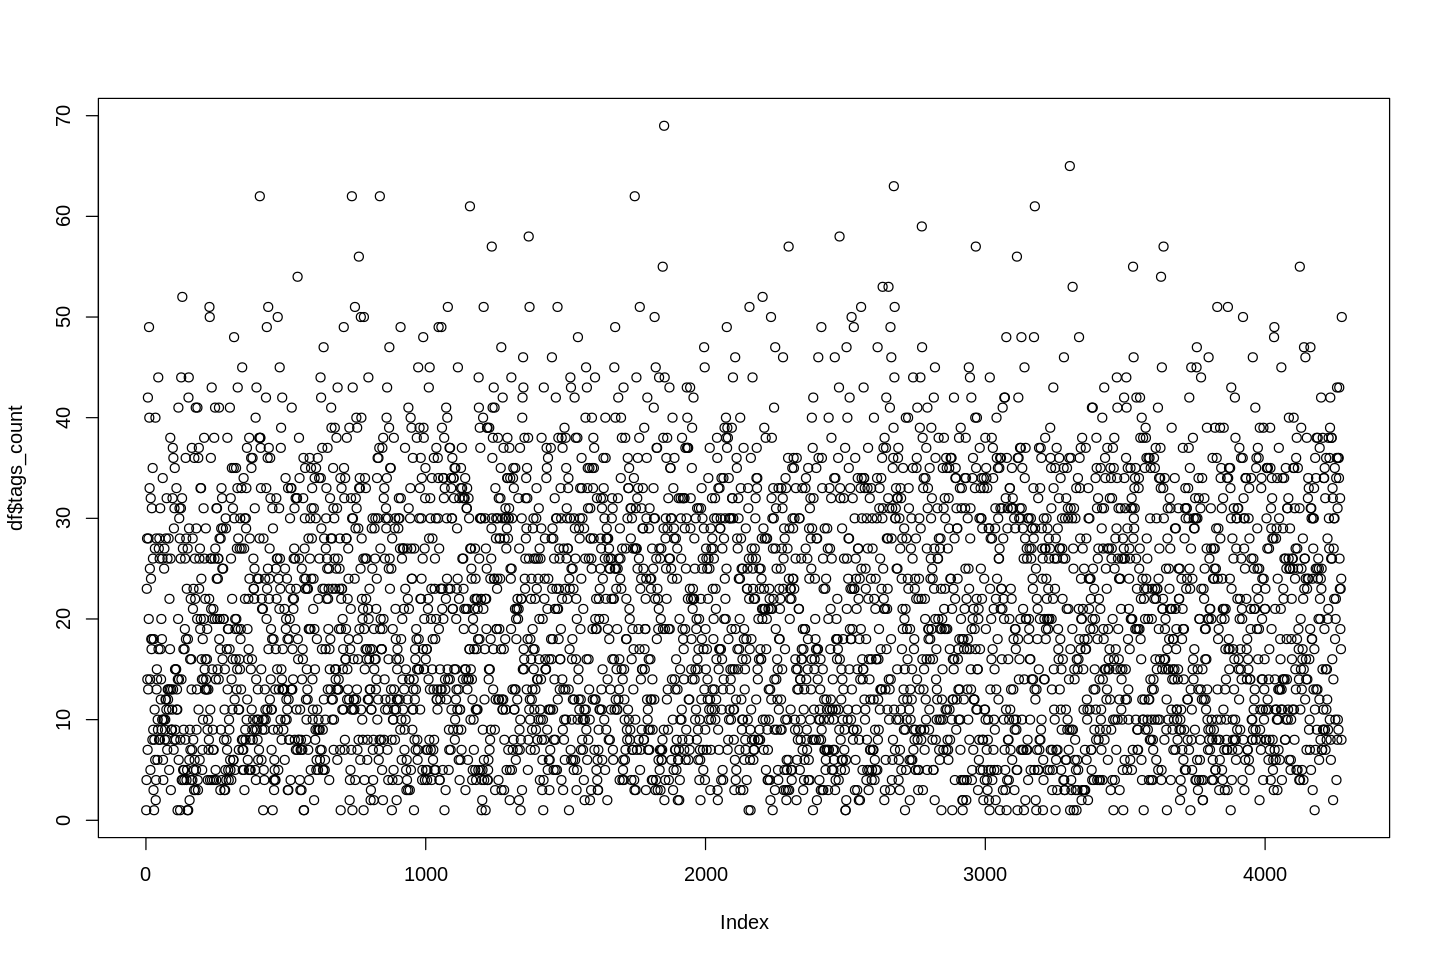

In [ ]:
plot(df$tags_count)

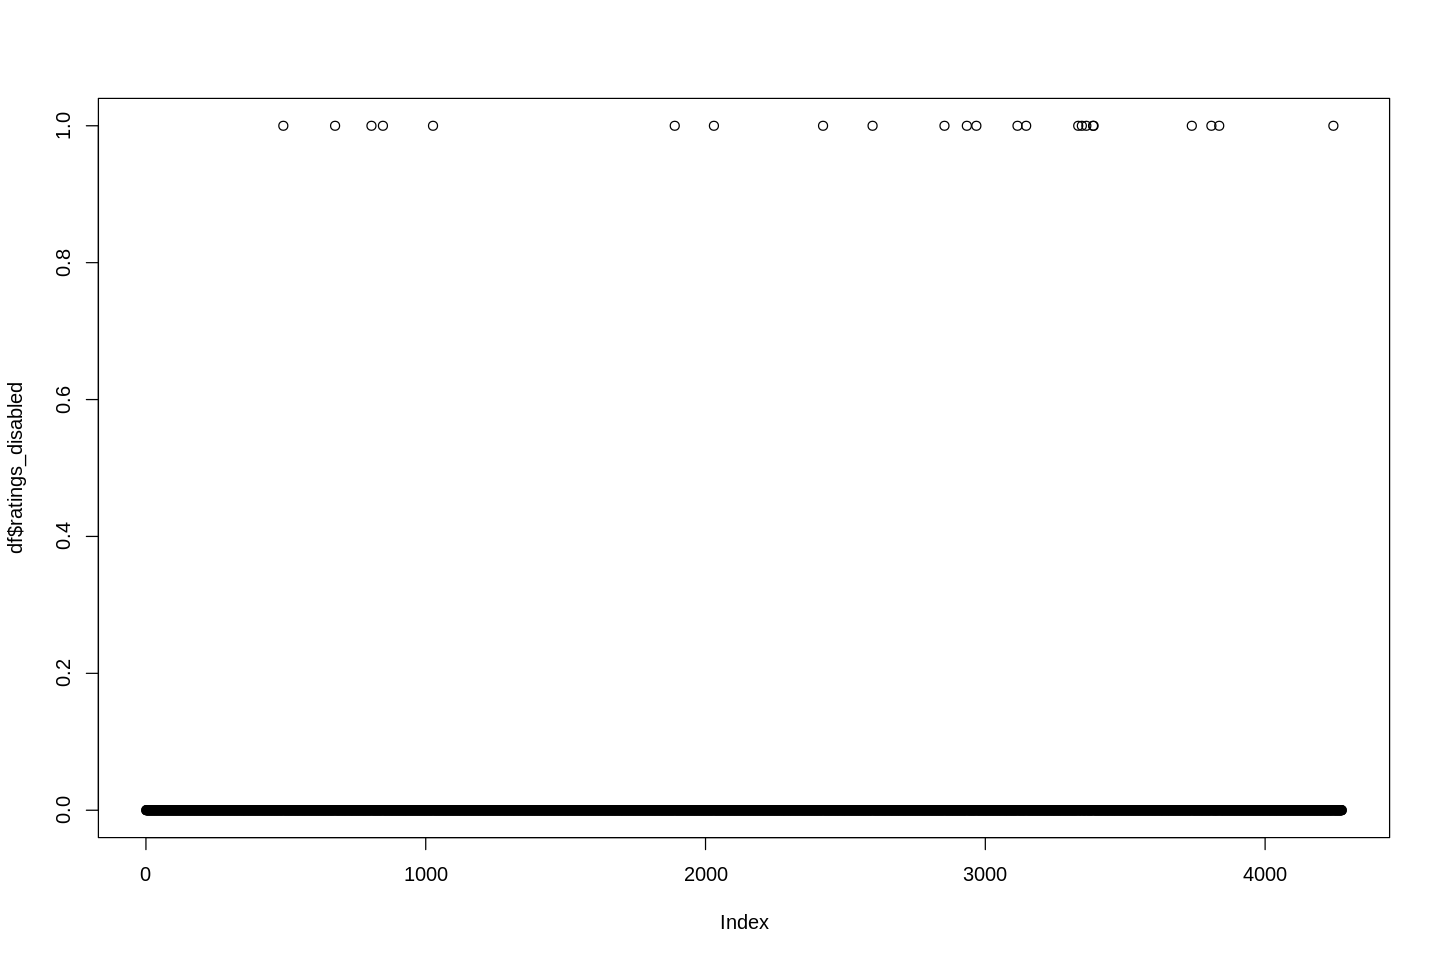

In [ ]:
plot(df$ratings_disabled)

# Bivariate Analysis

*Views* v/s Likes Score

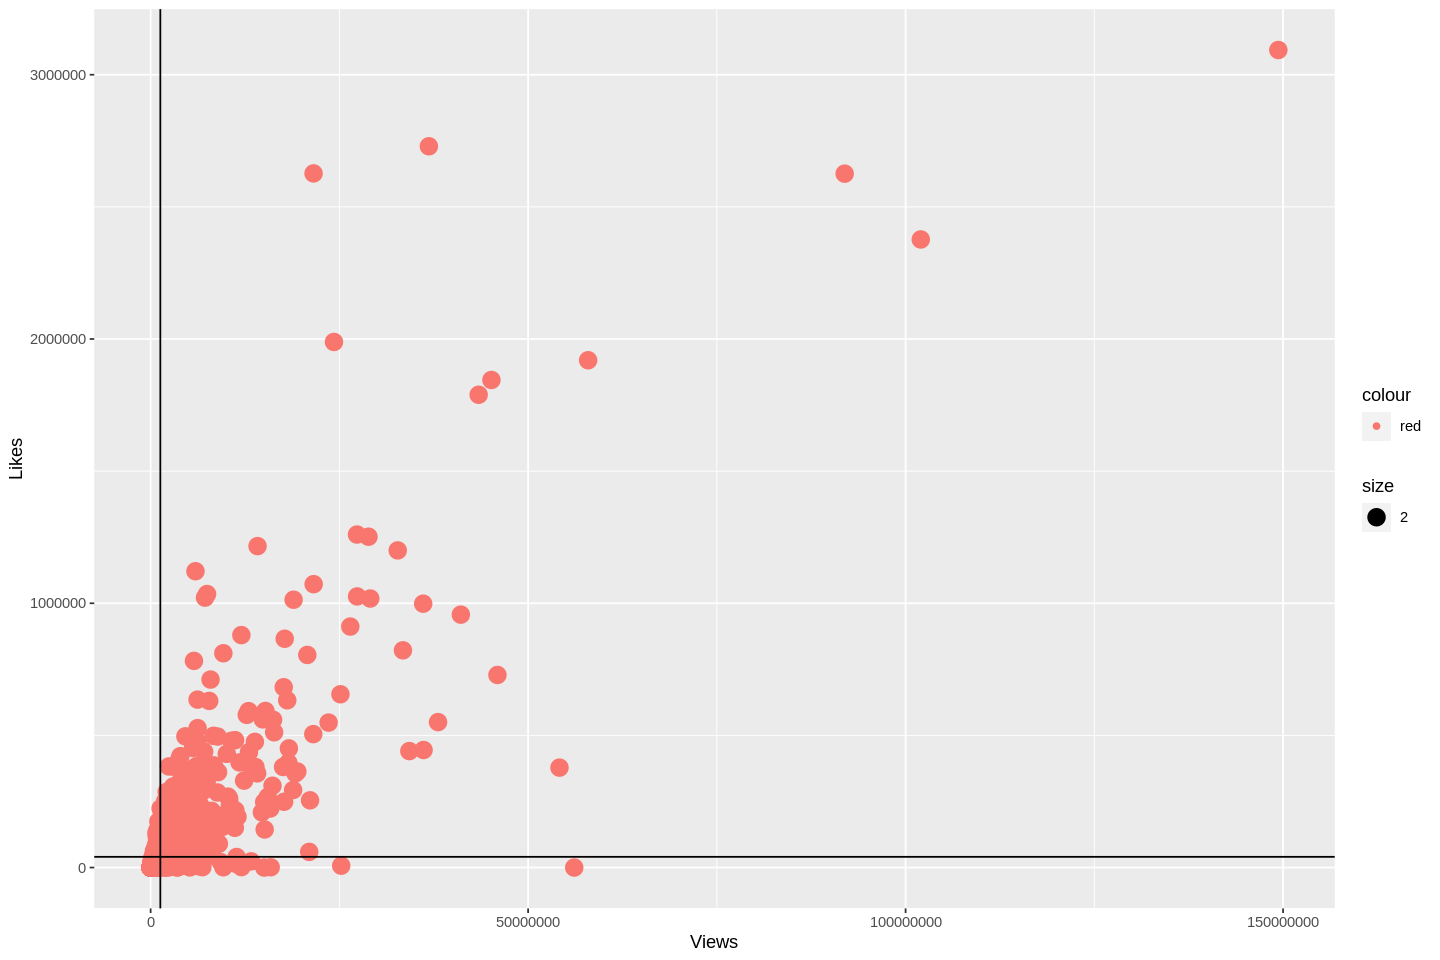

In [ ]:
g=ggplot(df,aes(x=views,y=likes))
g=g+geom_point(aes(colour="red",size=2))
g=g+labs(x="Views",y="Likes")
g+geom_hline(yintercept=mean(df$likes),size=0.5)+geom_vline(xintercept=mean(df$views),size=0.5)

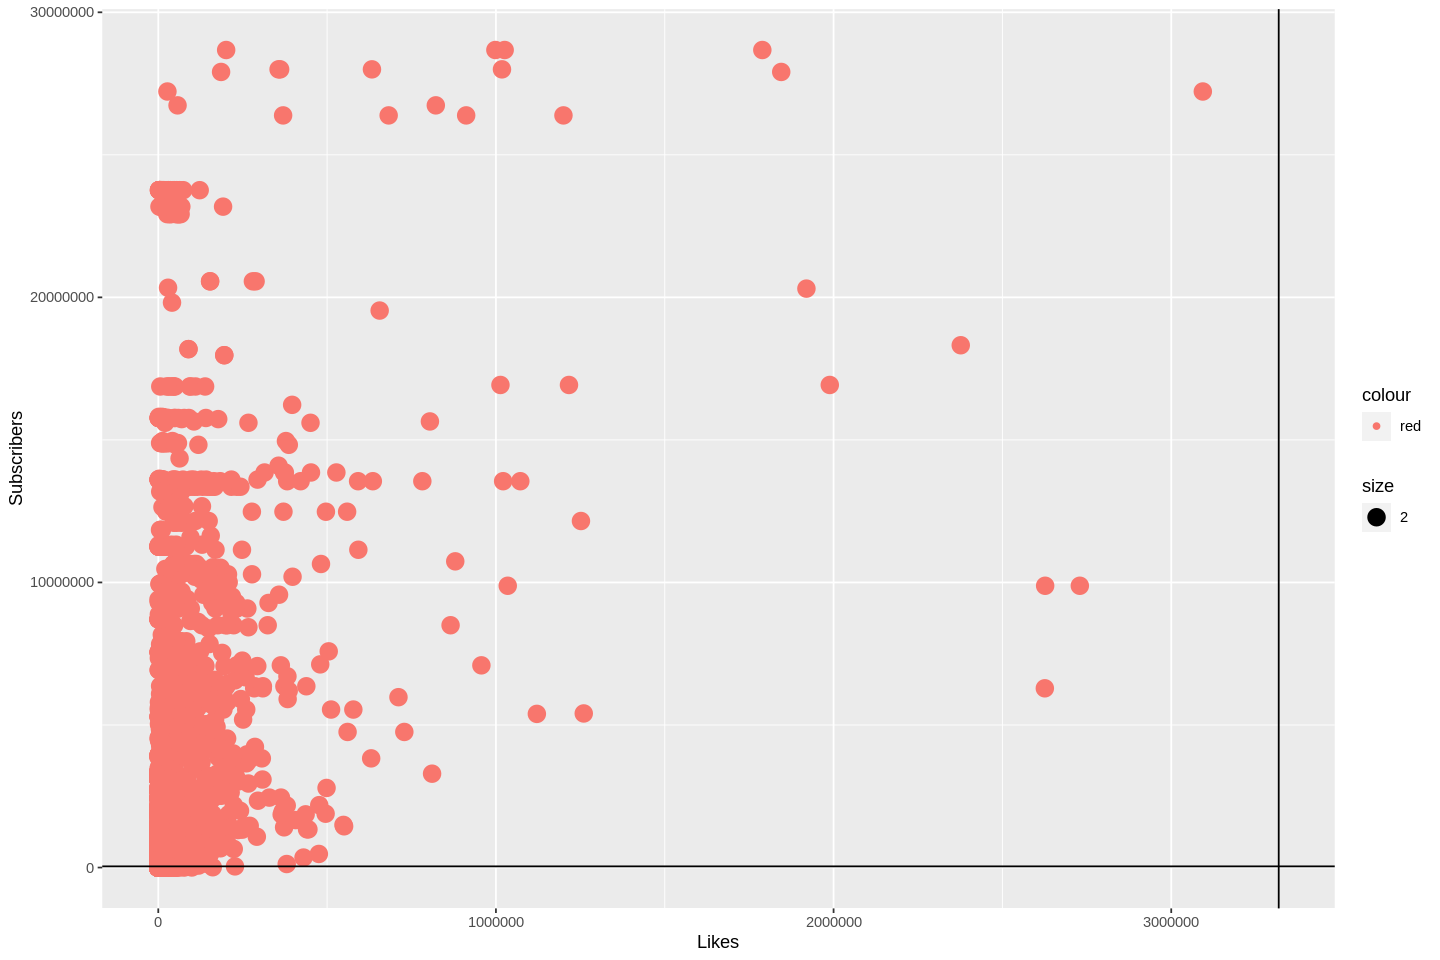

In [ ]:
g=ggplot(df,aes(x=likes,y=subscriber))
g=g+geom_point(aes(colour="red",size=2))
g=g+labs(x="Likes",y="Subscribers")
g+geom_hline(yintercept=mean(df$likes),size=0.5)+geom_vline(xintercept=mean(df$subscriber),size=0.5)

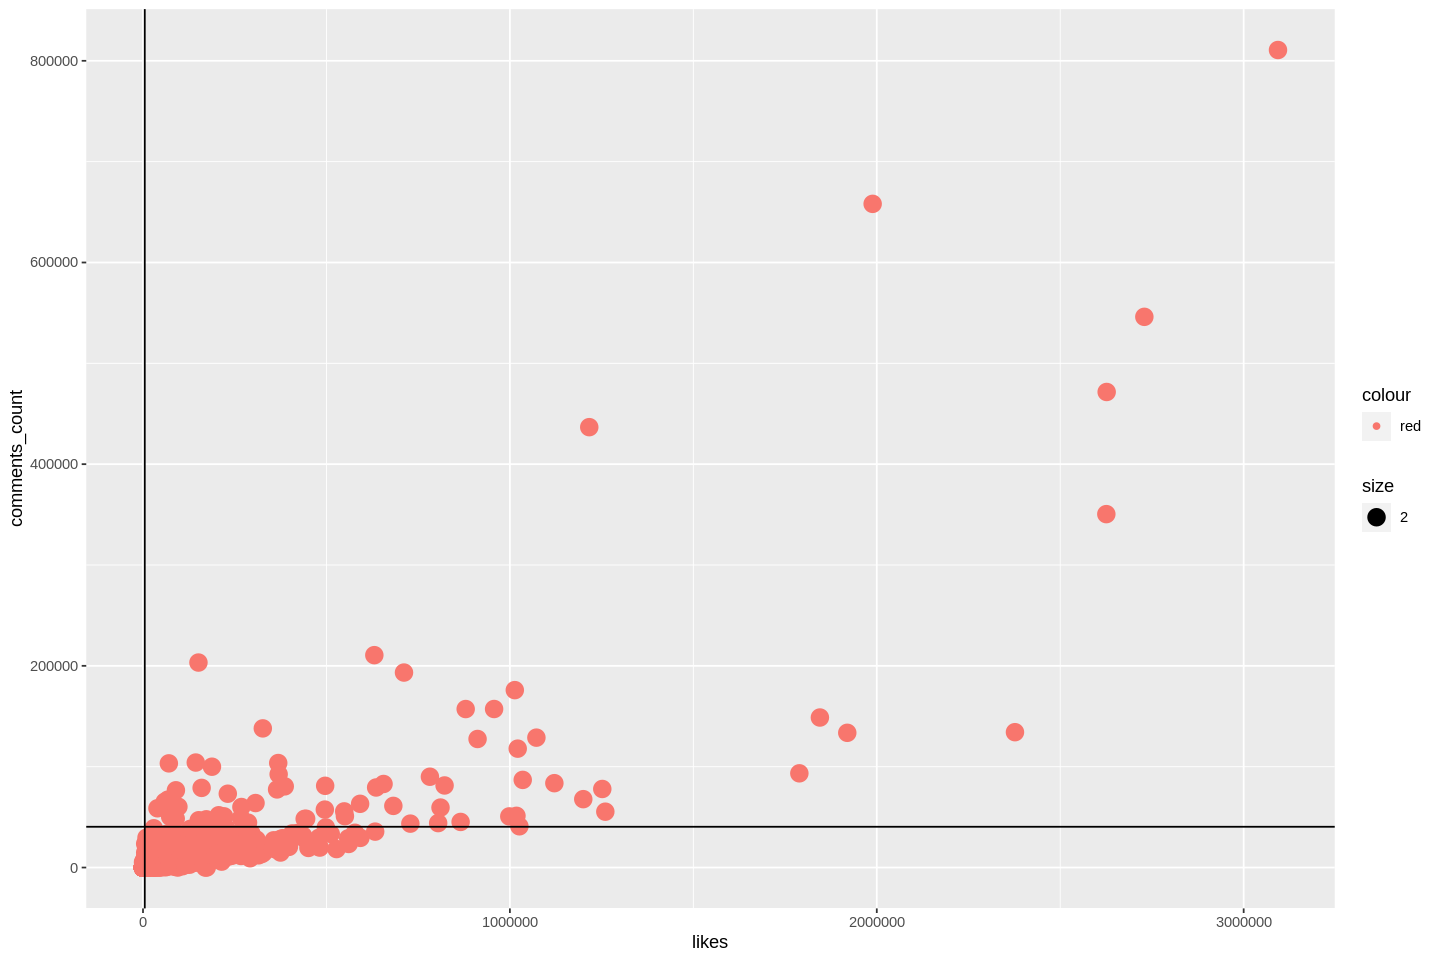

In [ ]:
g=ggplot(df,aes(x=likes,y=comment_count))
g=g+geom_point(aes(colour="red",size=2))
g=g+labs(x="likes",y="comments_count")
g+geom_hline(yintercept=mean(df$likes),size=0.5)+geom_vline(xintercept=mean(df$comment_count),size=0.5)

# Creating Linear Regression Model

In [ ]:
numerical_data <- df[c("views","likes","dislikes","comment_count","trend_day_count","trend_tag_highest","subscriber","tags_count")]

In [ ]:
model <- lm(subscriber~views+likes+dislikes+comment_count, data = numerical_data)
summary(model)


Call:
lm(formula = subscriber ~ views + likes + dislikes + comment_count, 
    data = numerical_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-22534978  -2650810  -1797128    475095  24122784 

Coefficients:
                   Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)   2874443.53977   74415.84793  38.627 < 0.0000000000000002 ***
views              -0.03709       0.03297  -1.125               0.2606    
likes              16.41492       1.35526  12.112 < 0.0000000000000002 ***
dislikes           10.77981       4.45286   2.421               0.0155 *  
comment_count     -40.86480       7.01088  -5.829          0.000000006 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4638000 on 4269 degrees of freedom
Multiple R-squared:  0.1083,	Adjusted R-squared:  0.1075 
F-statistic: 129.7 on 4 and 4269 DF,  p-value: < 0.00000000000000022


In [ ]:
coef(model)

(Intercept)            views            likes         dislikes 
2874443.53977142      -0.03709244      16.41491828      10.77981011 
   comment_count 
    -40.86480306

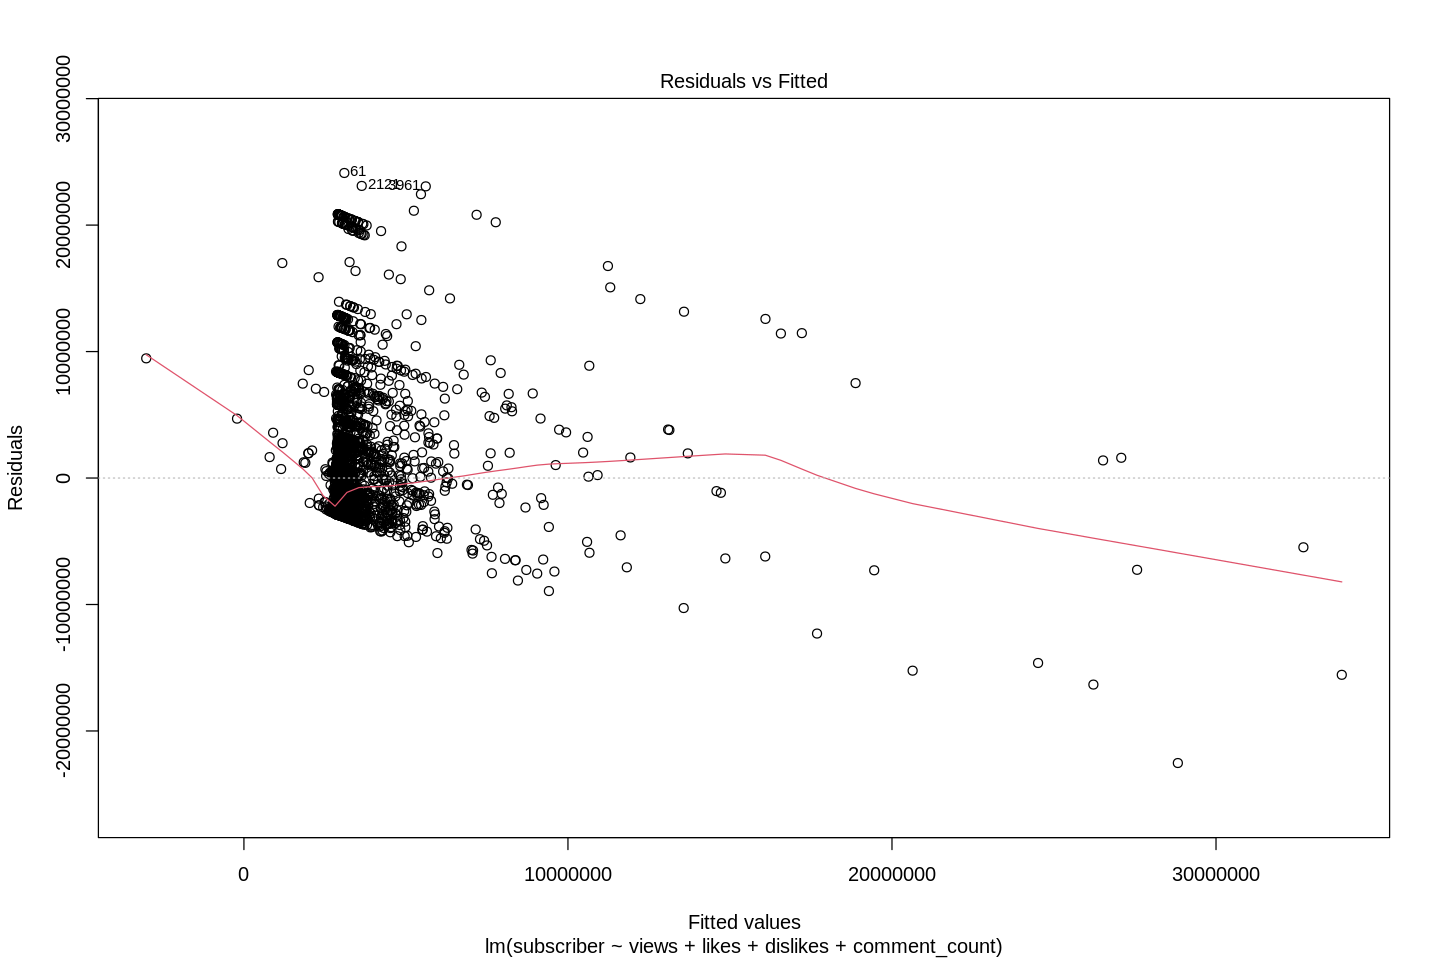

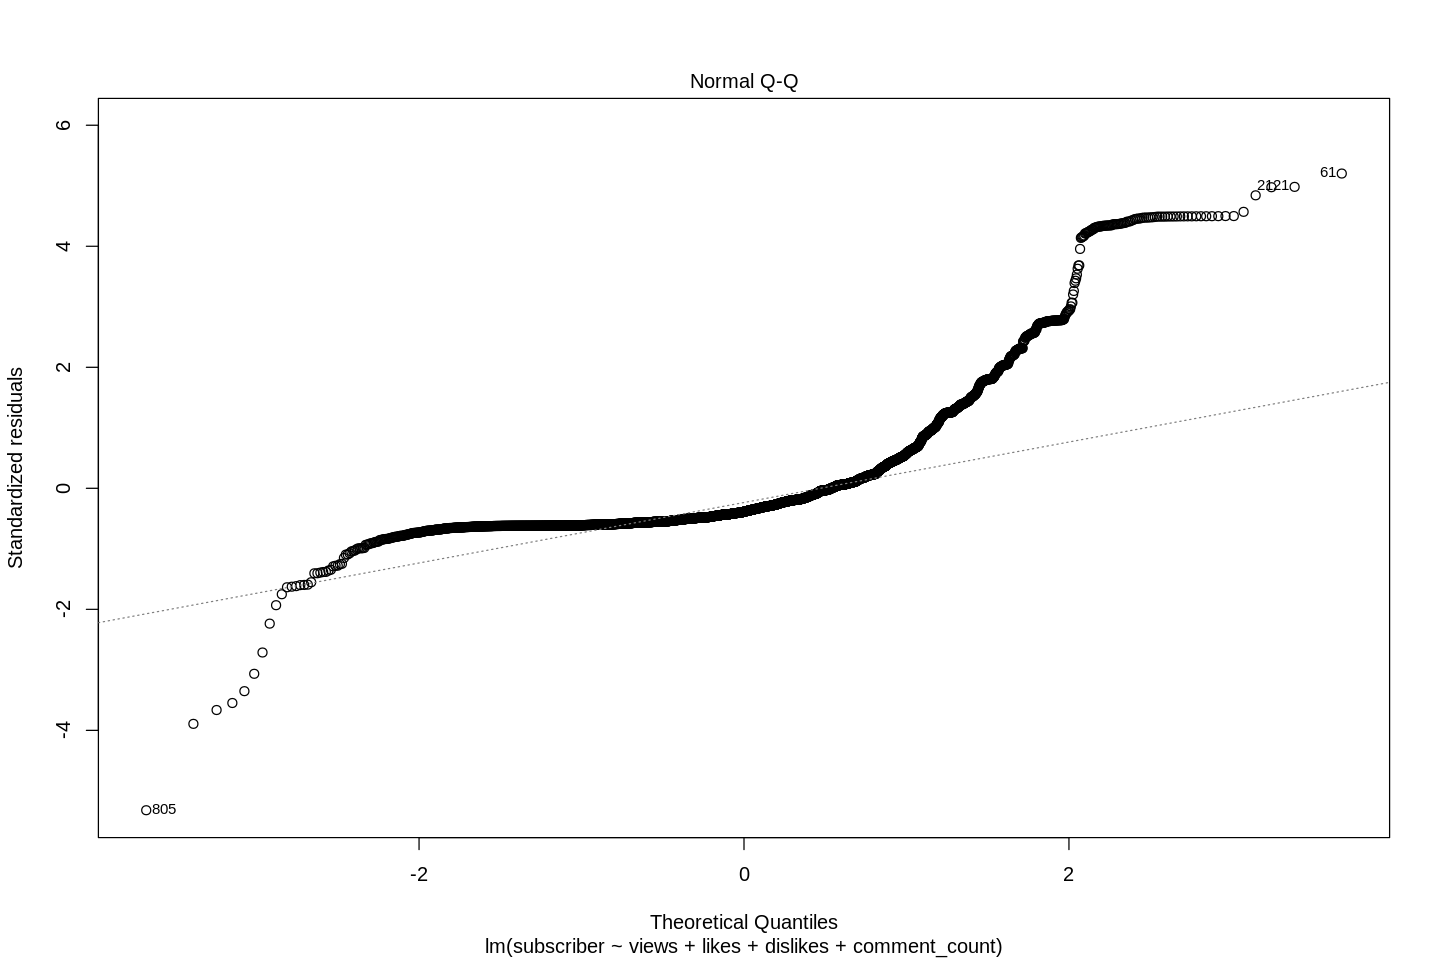

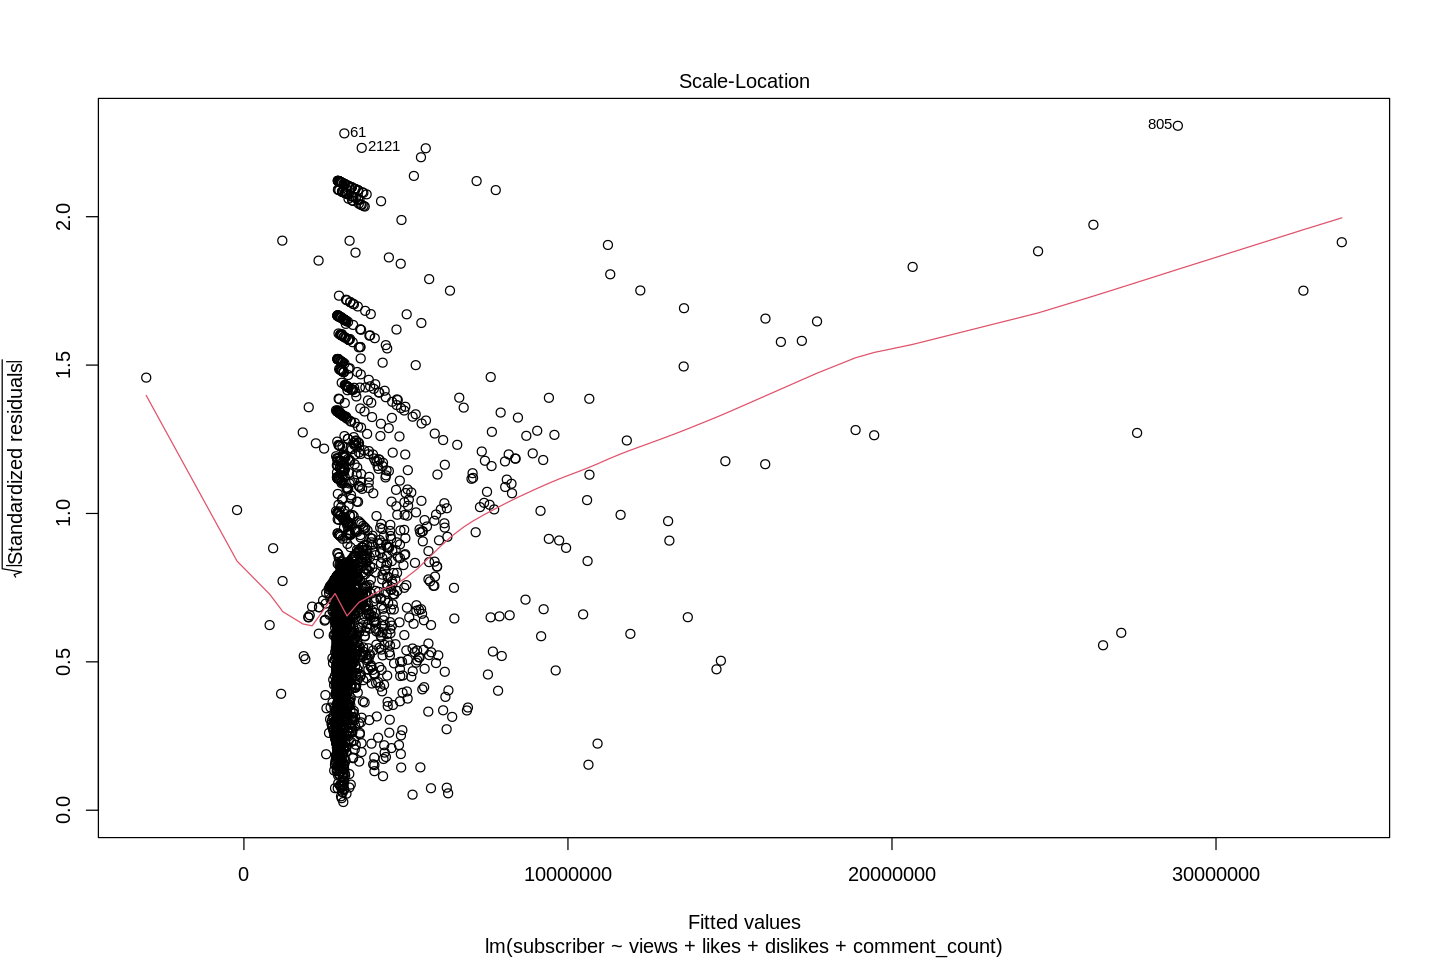

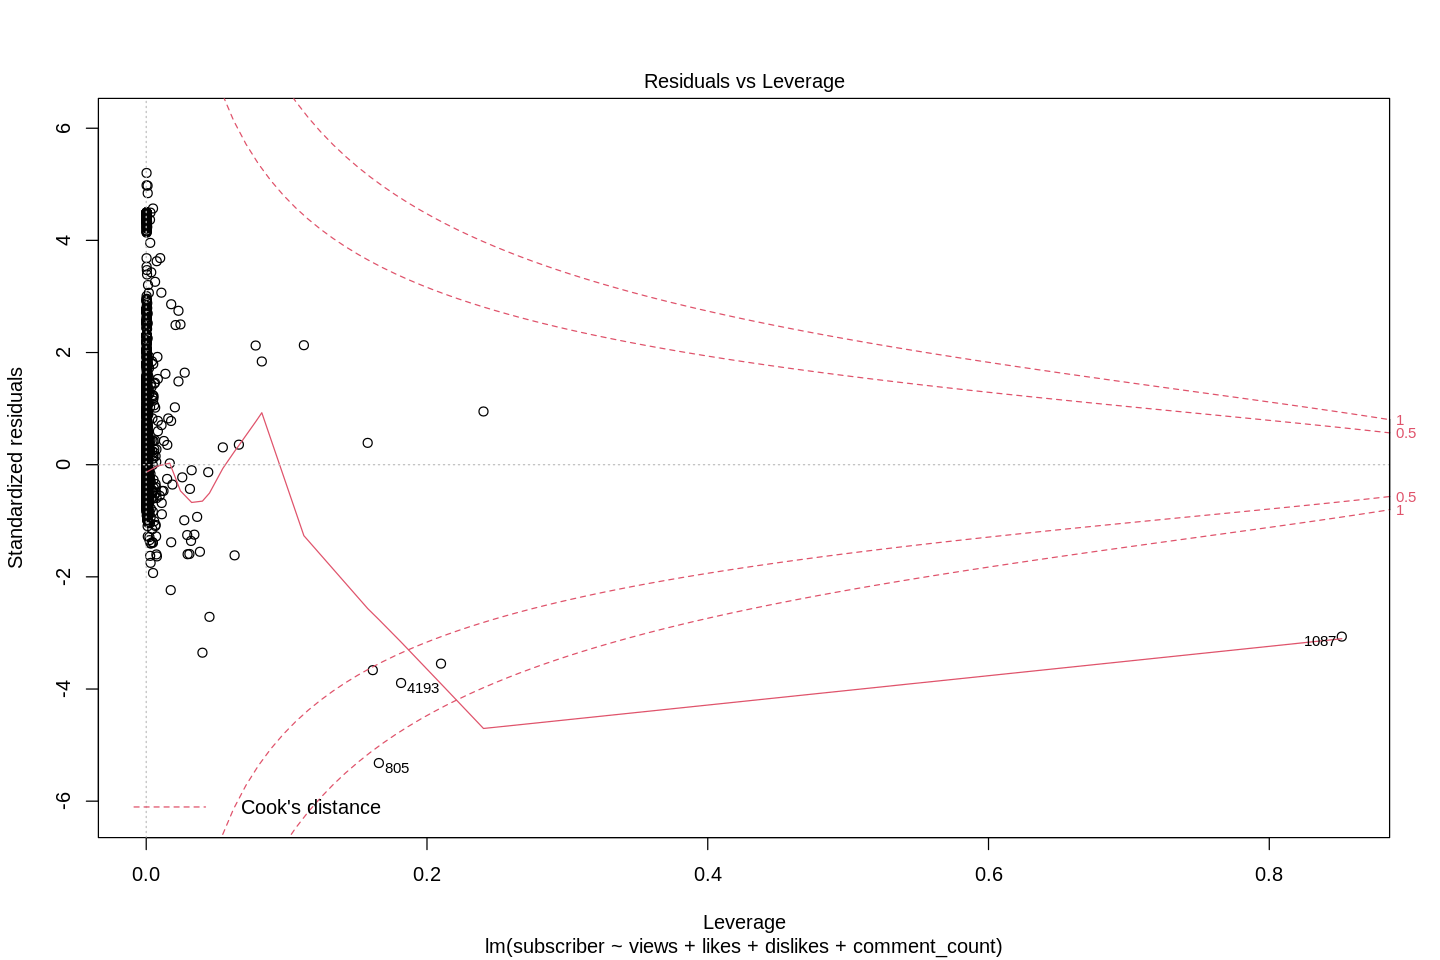

In [ ]:
plot(model)

# Evaluation

In [ ]:
set.seed(123)
training.samples <- numerical_data$subscriber %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- numerical_data[training.samples, ]
test.data <- numerical_data[-training.samples, ]

In [ ]:
predictions <- model %>% predict(test.data)
# Model performance
RMSE(predictions, test.data$subscriber)



[1] 4549346

In [ ]:
rmse <- round(sqrt(mean(resid(model)^2)), 2)
coefs <- coef(model)
b0 <- round(coefs[1], 2)
b1 <- round(coefs[2],2)
r2 <- round(summary(model)$r.squared, 2)
## Plot the data
eqn <- bquote(italic(y) == .(b0) + .(b1)*italic(x) * "," ~~ 
                  r^2 == .(r2) * "," ~~ RMSE == .(rmse))
plot(y ~ x, data = predictions)
abline(fit)
text(2, 10, eqn, pos = 4)

ERROR: ignored

In [ ]:
R2(predictions, test.data$subscriber)

In [ ]:
value <- "17/04/21 18:00"
as.character(value, ...)

ERROR: ignored